In [1]:
!wget 'http://labfile.oss.aliyuncs.com/courses/1081/avatar.zip'
!unzip -o 'avatar.zip'

Archive:  avatar.zip
   creating: avatar/
   creating: avatar/data/
  inflating: avatar/data/avatar_0001.jpg  
  inflating: avatar/data/avatar_0002.jpg  
  inflating: avatar/data/avatar_0003.png  
  inflating: avatar/data/avatar_0004.png  
  inflating: avatar/data/avatar_0005.jpg  
  inflating: avatar/data/avatar_0006.jpg  
  inflating: avatar/data/avatar_0007.jpg  
  inflating: avatar/data/avatar_0008.jpg  
  inflating: avatar/data/avatar_0009.png  
  inflating: avatar/data/avatar_0010.jpg  
  inflating: avatar/data/avatar_0011.jpg  
  inflating: avatar/data/avatar_0012.jpg  
  inflating: avatar/data/avatar_0013.jpg  
  inflating: avatar/data/avatar_0014.jpg  
  inflating: avatar/data/avatar_0015.png  
  inflating: avatar/data/avatar_0016.jpg  
  inflating: avatar/data/avatar_0017.jpg  
  inflating: avatar/data/avatar_0018.jpg  
  inflating: avatar/data/avatar_0019.jpg  
  inflating: avatar/data/avatar_0020.png  
  inflating: avatar/data/avatar_0021.jpg  
  inflating: avatar/data/avat

In [1]:
import tensorflow as tf

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

path='avatar/data/'
fs=os.listdir('avatar/data/')
img=cv2.imread(path+fs[0])
img.shape

(96, 96, 3)

In [3]:
imgs_batch=np.random.choice(fs,3000)
imgs_batch

array(['avatar_2750.jpg', 'avatar_1435.jpg', 'avatar_1754.jpg', ...,
       'avatar_1169.png', 'avatar_2923.png', 'avatar_0110.jpg'],
      dtype='<U15')

In [4]:
sample_dim=(16,)+(64,64,3)
sample_dim

(16, 64, 64, 3)

In [5]:
len(fs)

3000

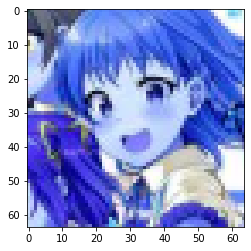

In [6]:
from IPython import display

samples=np.empty((3000,64,64,3),dtype=np.float32)
for i,p in enumerate(fs):
    img=cv2.imread(path+p)
    img=cv2.resize(img,(64,64))
    plt.imshow(img)
    #display.display(plt.gcf())
    #display.clear_output(wait=True)
    samples[i,...]=img

In [7]:
samples.shape

(3000, 64, 64, 3)

In [8]:
samples=samples.astype('float32')/255
samples[0]

array([[[0.6392157 , 0.78431374, 0.7490196 ],
        [0.627451  , 0.75686276, 0.7019608 ],
        [0.654902  , 0.7607843 , 0.6784314 ],
        ...,
        [0.7372549 , 0.89411765, 0.9529412 ],
        [0.7411765 , 0.89411765, 0.9490196 ],
        [0.7490196 , 0.8980392 , 0.94509804]],

       [[0.6784314 , 0.8235294 , 0.79607844],
        [0.45882353, 0.5882353 , 0.5372549 ],
        [0.68235296, 0.7882353 , 0.7058824 ],
        ...,
        [0.73333335, 0.8901961 , 0.9490196 ],
        [0.7411765 , 0.8901961 , 0.94509804],
        [0.74509805, 0.89411765, 0.9411765 ]],

       [[0.70980394, 0.85882354, 0.8392157 ],
        [0.5254902 , 0.6627451 , 0.62352943],
        [0.60784316, 0.7176471 , 0.64705884],
        ...,
        [0.72156864, 0.8862745 , 0.94509804],
        [0.73333335, 0.8862745 , 0.9411765 ],
        [0.7411765 , 0.8901961 , 0.9372549 ]],

       ...,

       [[0.5294118 , 0.5764706 , 0.44313726],
        [0.52156866, 0.5686275 , 0.29411766],
        [0.44705883, 0

import glob

glob.glob('avatar/data/*.jpg')

raw_data=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,zoom_range=.2)
train_data=raw_data.flow_from_directory('avatar/',target_size=(64,64),batch_size=16)

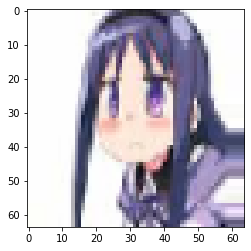

In [3]:
imgs,labels=next(train_data)

import matplotlib.pyplot as plt

plt.imshow(imgs[0])

imgs[0].shape

imgs.shape

In [9]:
g_model=tf.keras.Sequential([
    tf.keras.layers.Conv2DTranspose(512,kernel_size=(4,4),strides=(1,1),input_shape=(1,1,100)),
    tf.keras.layers.BatchNormalization(epsilon=1e-05,momentum=.1),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Conv2DTranspose(256,kernel_size=(4,4),strides=(2,2),padding='same'),
    tf.keras.layers.BatchNormalization(epsilon=1e-05,momentum=.1),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Conv2DTranspose(128,kernel_size=(4,4),strides=(2,2),padding='same'),
    tf.keras.layers.BatchNormalization(epsilon=1e-05,momentum=.1),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Conv2DTranspose(64,kernel_size=(4,4),strides=(2,2),padding='same'),
    tf.keras.layers.BatchNormalization(epsilon=1e-05,momentum=.1),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Conv2DTranspose(3,kernel_size=(4,4),strides=(2,2),padding='same'),
    tf.keras.layers.Activation('tanh')
])

opt=tf.keras.optimizers.Adam(lr=.0002,beta_1=.5)
g_model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['acc'])
g_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose (Conv2DTran (None, 4, 4, 512)         819712    
_________________________________________________________________
batch_normalization (BatchNo (None, 4, 4, 512)         2048      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 4, 4, 512)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 8, 8, 256)         2097408   
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 16, 16, 128)       5

In [10]:
d_model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,kernel_size=(4,4),strides=(2,2),padding='same',input_shape=(64,64,3)),
    tf.keras.layers.BatchNormalization(epsilon=1e-05,momentum=.1),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Conv2D(128,kernel_size=(4,4),strides=(2,2),padding='same'),
    tf.keras.layers.BatchNormalization(epsilon=1e-05,momentum=.1),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Conv2D(256,kernel_size=(4,4),strides=(2,2),padding='same'),
    tf.keras.layers.BatchNormalization(epsilon=1e-05,momentum=.1),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Conv2D(512,kernel_size=(4,4),strides=(2,2),padding='same'),
    tf.keras.layers.BatchNormalization(epsilon=1e-05,momentum=.1),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Conv2D(1,kernel_size=(4,4),strides=(1,1),padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Activation('sigmoid')
])

d_model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['acc'])
d_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        3136      
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       131200    
_________________________________________________________________
batch_normalization_5 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)        

d_model.fit_generator(train_data,steps_per_epoch=10,epochs=10)

In [11]:
def generate_fake_avatars(half_batch=8):
    x=np.random.rand(64*64*3*half_batch)
    x=x.reshape((half_batch,64,64,3))
    y=np.zeros((half_batch,1))
    return x,y

In [12]:
def generate_real_avatars(samples=samples,half_batch=8):
    ix=np.random.randint(0,samples.shape[0],half_batch)
    x=samples[ix]
    y=np.ones((half_batch,1))
    return x,y

In [14]:
def train_discriminator(d_model=d_model,samples=samples,n_iter=200):
    for i in range(n_iter):
        x_real,y_real=generate_real_avatars()
        _,real_acc=d_model.train_on_batch(x_real,y_real)
        x_fake,y_fake=generate_fake_avatars()
        _,fake_acc=d_model.train_on_batch(x_fake,y_fake)
        print('>%d real=%.0f%% fake=%.0f%%' % (i+1,real_acc*100,fake_acc*100))

In [16]:
train_discriminator()

>1 real=25% fake=0%
>2 real=100% fake=12%
>3 real=100% fake=88%
>4 real=75% fake=100%
>5 real=100% fake=100%
>6 real=100% fake=100%
>7 real=100% fake=100%
>8 real=88% fake=100%
>9 real=100% fake=100%
>10 real=100% fake=100%
>11 real=100% fake=100%
>12 real=100% fake=100%
>13 real=100% fake=100%
>14 real=100% fake=100%
>15 real=100% fake=100%
>16 real=100% fake=100%
>17 real=88% fake=100%
>18 real=100% fake=100%
>19 real=100% fake=100%
>20 real=100% fake=100%
>21 real=100% fake=100%
>22 real=100% fake=100%
>23 real=88% fake=100%
>24 real=100% fake=100%
>25 real=100% fake=100%
>26 real=100% fake=100%
>27 real=88% fake=100%
>28 real=100% fake=100%
>29 real=100% fake=100%
>30 real=100% fake=100%
>31 real=100% fake=100%
>32 real=100% fake=100%
>33 real=100% fake=100%
>34 real=100% fake=100%
>35 real=100% fake=100%
>36 real=100% fake=100%
>37 real=100% fake=100%
>38 real=88% fake=100%
>39 real=100% fake=100%
>40 real=100% fake=100%
>41 real=100% fake=100%
>42 real=100% fake=100%
>43 real=100

In [22]:
def generate_latent_points(latent_dim=100,half_batch=8):
    x_input=np.random.rand(latent_dim*half_batch).reshape(half_batch,1,1,latent_dim)
    return x_input

In [23]:
def generate_fake_avatars_2(g_model=g_model,latent_dim=100,half_batch=8):
    x_input=generate_latent_points(latent_dim,half_batch)
    x=g_model.predict(x_input)
    y=np.zeros((half_batch,1))
    return x,y

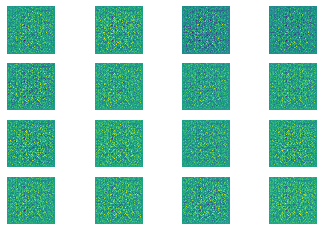

In [28]:
x,_=generate_fake_avatars_2(half_batch=16)

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    plt.imshow(x[i,:,:,0]*255)
plt.show()

In [26]:
d_model.trainable=False
model=tf.keras.Sequential([
    g_model,
    d_model,
])
model.compile(loss='binary_crossentropy',optimizer=opt)

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 64, 64, 3)         3579587   
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 2768594   
Total params: 6,348,181
Trainable params: 3,577,667
Non-trainable params: 2,770,514
_________________________________________________________________


In [82]:
def summarize_performance(epochs,g_model=g_model,d_model=d_model,samples=samples,latent_dim=100,n=16):
    x_real,y_real=generate_real_avatars(half_batch=n)
    _,acc_real=d_model.evaluate(x_real,y_real,verbose=0)
    x_fake,y_fake=generate_fake_avatars_2(half_batch=n)
    _,acc_fake=d_model.evaluate(x_fake,y_fake,verbose=0)
    print('>Epochs %d, Accuracy real: %.0f%%, fake: %.0f%%'%(epochs+1,acc_real*100,acc_fake*100))
    save_plot(x_fake,epochs)
    filename='generator_model_%03d.h5'%(epochs+1)
    g_model.save(filename)

In [83]:
def save_plot(chosen,epochs,n=16):
    for i in range(n):
        plt.subplot(4,4,1+i)
        plt.axis('off')
        plt.imshow(chosen[i,:,:,0]*255)
        
    display.display(plt.gcf())
    display.clear_output(wait=True)
    filename='generator_plot_%03d.png'%(epochs+1)
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

In [84]:
def train(g_model=g_model,d_model=d_model,model=model,samples=samples,latent_dim=100,epochs=100,batch=16):
    batch_per_epoch=int(samples.shape[0]/batch)
    half_batch=int(batch/2)
    for i in range(epochs):
        for j in range(batch_per_epoch):
            x_real,y_real=generate_real_avatars()
            x_fake,y_fake=generate_fake_avatars_2()
            x,y=np.vstack((x_real,x_real)),np.vstack((y_real,y_fake))
            d_loss,_=d_model.train_on_batch(x,y)
            x_gan=generate_latent_points(half_batch=16)
            y_gan=np.ones((batch,1))
            g_loss=model.train_on_batch(x_gan,y_gan)
            #print('>%d,%d/%d,d=%.3f,g=%.3f'%(i+1,j+1,batch_per_epoch,d_loss,g_loss))
        if (i+1)%10==0:
            summarize_performance(epochs=i)

>Epochs 0, Accuracy real: 56%, fake: 0%


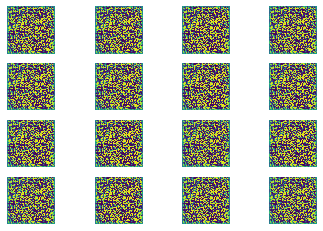

In [81]:
train()